# 5 Binary Typologies
# NYU - CUSP UDP Capstone
## Brief
This notebook 
1. Part I. Data Processing
    - imports the Census Tract shapefile
    - import Typologies
    - merges topologies
    - map topologies
    - outputs a .csv of the results
    - You can refer to https://github.com/mv1742/updny_2

###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [1]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Census Tract shapefile
- imports the Census Tract shapefile


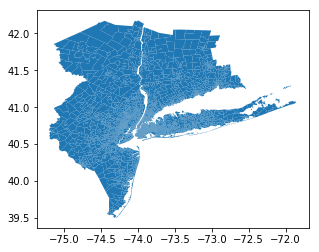

In [2]:
# url = 'https://planninglabs.carto.com/api/v2/sql?filename=region&q=SELECT%20%2A%20FROM%20region_censustract_v0&format=SHP'
# NYCzip = getGeoDataFrameFromShpFileZipUrl(url)
NYCzip=gpd.read_file('Censustracts/region.shp')
NYCzip.plot()

In [3]:
NYCzip.columns

Index(['aland_mi', 'objectid', 'statefp', 'countyfp', 'tractce', 'geoid',
       'name', 'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'shape_leng', 'shape_area', 'atotal', 'atotal_mi',
       'cartodb_id', 'geoid_1', 'hou16', 'hou16moe', 'hou16cv', 'houv16',
       'houv16moe', 'houv16cv', 'houo16', 'houo16moe', 'houo16cv', 'hour16',
       'hour16moe', 'hour16cv', 'emtot15', 'empr15', 'emoff15', 'emins15',
       'emind15', 'emser15', 'emoth15', 'geometry'],
      dtype='object')

In [4]:
NYCzip.rename(columns={"geoid": "GEOID"},inplace=True)
NYCzip.GEOID = NYCzip.GEOID.astype(int)
cols = ['GEOID','geometry']
NYCzip = NYCzip.loc[:,cols]
#NYCzipgdp.plot(column='GEOID',legend = True)
NYCzip.shape
NYCzip.isnull().sum()

GEOID       0
geometry    0
dtype: int64

# Typologies
- import Typologies
- merges topologies
- map topologies

In [5]:
Typologiespd=pd.read_csv('NY_final_data_for_typologies_1.19.19.csv')
Typologiespd.shape

(5298, 82)

In [6]:
# sfig = pd.plotting.scatter_matrix(Typologiesgdp, s=30, figsize=(10, 10), diagonal='kde')

In [7]:
Typologiesgdp = gpd.GeoDataFrame(Typologiespd)
Typologiesgdp['Type_1.19'].unique()

array(['VHI - Super Gentrification or Exclusion',
       'MHI - Ongoing Exclusion',
       'MHI - Stable or Early Stage of Exclusion',
       'MHI - Advanced Exclusion', 'LI - At Risk of Gentrification',
       'MHI - Advanced Gentrification',
       'LI - Not Losing Low-Income Households',
       'LI - Ongoing Displacement of Low-Income Households',
       'Missing Data', 'LI - Ongoing Gentrification', nan], dtype=object)

In [8]:
Typologiesgdp['Ongoing_adv_gent'] = Typologiesgdp['Type_1.19'].copy()
Typologiesgdp['Ongoing_adv_gent'].replace('VHI - Super Gentrification or Exclusion',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Ongoing Exclusion',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Stable or Early Stage of Exclusion',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Advanced Exclusion', 0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('MHI - Advanced Gentrification',1,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - At Risk of Gentrification',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - Ongoing Gentrification',1,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - Not Losing Low-Income Households',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('LI - Ongoing Displacement of Low-Income Households',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace('Missing Data',0,inplace=True)
Typologiesgdp['Ongoing_adv_gent'].replace(nan,0,inplace=True)


In [9]:
Typologiesgdp.head(1)

,geoid,typology_old,medrent90,medrent00,medrent16,medhval90,medhval00,medhval16,percol90,percol00,...,ch_all_li_count00_16,liloss9016,per_limove16,per_limove09,exclusion,popgrowth0016,Incch0016,li_hh_16,Typology_final_1.19.19,Ongoing_adv_gent
0,9.001010e+09,MHI - At Risk of Exclusion,1001.0,1601.0,1510.0,500001.0,1000001.0,1494000.0,0.516292,0.354071,...,136.0813599,0,0.6400990486,0.3994323015,0,0.0,0.5498838311,401.65921,LI - At Risk of Gentrification,0.0


In [10]:
Typologiesgdp.columns

Index(['geoid', 'typology_old', 'medrent90', 'medrent00', 'medrent16',
       'medhval90', 'medhval00', 'medhval16', 'percol90', 'percol00',
       'percol16', 'pernwh90', 'pernwh00', 'pernwh16', 'perli90', 'perli00',
       'perli16', 'per_rent_90', 'per_rent_00', 'per_rent16', 'pop00', 'pop16',
       'asian_16_low', 'carcommuters_00', 'pre50_16', 'hhwch16', 'empd15',
       'density16', 'aland', 'li16', 'afford90', 'belowmedcol90',
       'abovemednwh', 'abovemedli', 'abovemedrent', 'vulnrisk90', 'vuln90',
       'afford00', 'belowmedcol00', 'abovemednwh00', 'abovemedli00',
       'abovemedrent00', 'vulnrisk00', 'vuln00', 'afford16', 'belowmedcol16',
       'abovemednwh16', 'abovemedli16', 'abovemedrent16', 'vulnrisk16',
       'vuln16', 'hotmarket90(127%-169%)', 'hotmarket00(110%-207%)',
       'percol16.1', 'edudiff0016', 'abm_dif_0016', 'edudiff9000',
       'abm_dif_9000', 'hinc90_NYU', 'hinc00_NYU', 'hinc16_NYU', 'hinc90',
       'hinc00', 'hinc16', 'pct_ch_hinc90_00', 'pct_ch_

In [11]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)

In [12]:
Typologiesgdp['High_low'] = Typologiesgdp['Type_1.19'].copy()
Typologiesgdp['High_low'].replace('VHI - Super Gentrification or Exclusion','H',inplace=True)
Typologiesgdp['High_low'].replace('MHI - Ongoing Exclusion','H',inplace=True)
Typologiesgdp['High_low'].replace('MHI - Stable or Early Stage of Exclusion','H',inplace=True)
Typologiesgdp['High_low'].replace('MHI - Advanced Exclusion', 'H',inplace=True)
Typologiesgdp['High_low'].replace('MHI - Advanced Gentrification','H',inplace=True)
Typologiesgdp['High_low'].replace('LI - At Risk of Gentrification','L',inplace=True)
Typologiesgdp['High_low'].replace('LI - Ongoing Gentrification','L',inplace=True)
Typologiesgdp['High_low'].replace('LI - Not Losing Low-Income Households','L',inplace=True)
Typologiesgdp['High_low'].replace('LI - Ongoing Displacement of Low-Income Households','L',inplace=True)
Typologiesgdp['High_low'].replace('Missing Data',0,inplace=True)
Typologiesgdp['High_low'].replace(nan,0,inplace=True)

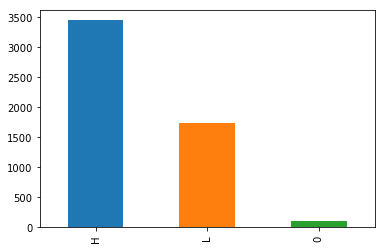

In [13]:
Typologiesgdp['High_low'].value_counts().plot(kind='bar')

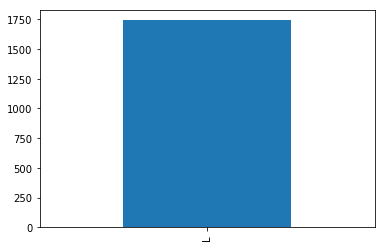

In [14]:
Typologiesgdp['High_low'][Typologiesgdp['High_low'] == 'L'].value_counts().plot(kind='bar')

# Karen's Typologies

In [15]:
Typvariant=pd.read_csv('./Data/NY gentrification dependent variables.csv')
print(Typvariant.shape)
Typvariant = gpd.GeoDataFrame(Typvariant)
len(Typvariant.columns), Typvariant.shape
# Typologiesgdp.drop(columns=['Type_1.19'], inplace=True)
Typvariant.head()
print(Typvariant.columns)
Typvariant.rename(columns={'geoid':'GEOID'},inplace=True)
Typologiesgdp = Typologiesgdp.drop(columns = ['gent00_16', 'gent90_00']).merge(Typvariant, on= 'GEOID')
print(Typvariant.isnull().sum())
Typvariant.GEOID.unique(), len(Typvariant.GEOID.unique())


(5294, 4)
Index(['geoid', 'gent90_00', 'gent00_16', 'Supergent16'], dtype='object')
GEOID            0
gent90_00       75
gent00_16       75
Supergent16    102
dtype: int64


(array([ 9001010102,  9001010201,  9001010202, ..., 36103190704,
        36111951600, 34035053801]), 5294)

In [16]:
Typvariant.GEOID[Typvariant.GEOID > 1.001010e+10].describe()

count    4.848000e+03
mean     3.541423e+10
std      9.528233e+08
min      3.400300e+10
25%      3.403112e+10
50%      3.604705e+10
75%      3.608104e+10
max      3.611998e+10
Name: GEOID, dtype: float64

In [17]:
Typvariant.GEOID[Typvariant.GEOID < 1.001010e+10].describe()

count    4.460000e+02
mean     9.004979e+09
std      3.826867e+06
min      9.001010e+09
25%      9.001072e+09
50%      9.005279e+09
75%      9.009166e+09
max      9.009362e+09
Name: GEOID, dtype: float64

In [18]:
# Typologiesgdp

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


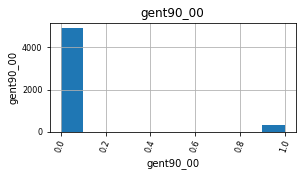

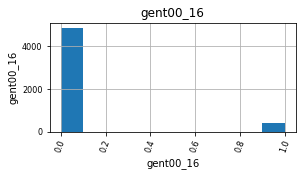

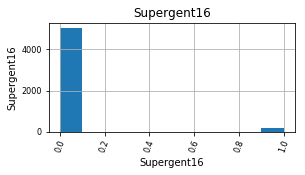

In [19]:
for i,H in enumerate(Typvariant.columns):
    if H == 'GEOID':
        continue
    fig = pl.figure(figsize=(15,2))
    pl.subplot(1,3,i)
    pl.title(H)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel(H)
    pl.ylabel(H)
    plt.xticks(rotation=70)
    Typvariant[H].hist()
    #ax.plot(schoolsq2[A], schoolsq2[P], label="start")
    plt.subplots_adjust(hspace=0.5)
    pl.legend()

# NEW BINARY TYPOLOGIES

In [20]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)
Typologiesgdp.tail()
cols_typ = ['GEOID','High_low','medrent00','medrent16',
            'medhval00','medhval16','hinc00','hinc16','percol00','percol16','pct_ch_hinc00_16',
           'gent00_16', 'gent90_00','Supergent16','Ongoing_adv_gent']
print(type(Typologiesgdp.iloc[:,0][0]))
#Typologies.rename(columns={'\ufeffgeoid': "GEOID"},inplace=True)
#Typologiesgdp.geoid = Typologies.iloc[:,0]
Typ_Bin = Typologiesgdp.loc[:,cols_typ].copy()
Typ_Bin.head()

<class 'numpy.float64'>


,GEOID,High_low,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,percol00,percol16,pct_ch_hinc00_16,gent00_16,gent90_00,Supergent16,Ongoing_adv_gent
0,9.001010e+09,H,1601.0,1510.0,1000001.0,1494000.0,273976.05,150655.0,0.354071,0.619597,-0.450116,0.0,0.0,1.0,0.0
1,9.001010e+09,H,1244.0,1628.0,1000000.0,2000000.0,290000.00,250000.0,0.748477,0.784978,-0.137931,0.0,0.0,0.0,0.0
2,9.001010e+09,H,833.0,2113.0,1000000.0,2000000.0,290000.00,212448.0,0.704225,0.761389,-0.267421,0.0,0.0,0.0,0.0
3,9.001010e+09,H,1791.0,2250.0,769300.0,1459900.0,157543.95,187875.0,0.342164,0.662879,0.192524,0.0,0.0,0.0,0.0
4,9.001010e+09,H,1967.0,1900.0,1000001.0,2000001.0,246540.60,221250.0,0.357744,0.805446,-0.102582,0.0,0.0,0.0,0.0


In [21]:
# # Typ_Bin
# sfig = pd.scatter_matrix(Typ_Bin, s=30, figsize=(10, 10), diagonal='kde')

In [22]:
Typ_Bin.percol00.describe(), Typ_Bin.percol16.describe()


(count    5290.000000
 mean        0.194462
 std         0.137087
 min         0.000000
 25%         0.097075
 50%         0.163948
 75%         0.253707
 max         1.000000
 Name: percol00, dtype: float64, count    5247.000000
 mean        0.366844
 std         0.201819
 min         0.000000
 25%         0.210793
 50%         0.331415
 75%         0.493451
 max         1.000000
 Name: percol16, dtype: float64)

In [23]:
# FIX medval16!
Typ_Bin.medhval00.describe(), Typ_Bin.medhval16.describe()


(count    5.218000e+03
 mean     2.198662e+05
 std      1.272452e+05
 min      0.000000e+00
 25%      1.496250e+05
 50%      1.928000e+05
 75%      2.538000e+05
 max      1.000001e+06
 Name: medhval00, dtype: float64, count    5.093000e+03
 mean     4.552332e+05
 std      2.713171e+05
 min      0.000000e+00
 25%      2.886000e+05
 50%      4.000000e+05
 75%      5.608000e+05
 max      2.000001e+06
 Name: medhval16, dtype: float64)

In [24]:
tempmerged = NYCzip.merge(Typ_Bin,on='GEOID')
list(tempmerged.columns)
print(type(tempmerged),tempmerged.shape)
tempmergedgpd = gpd.GeoDataFrame(tempmerged)
tempmergedgpd.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (5290, 16)


(5290, 16)

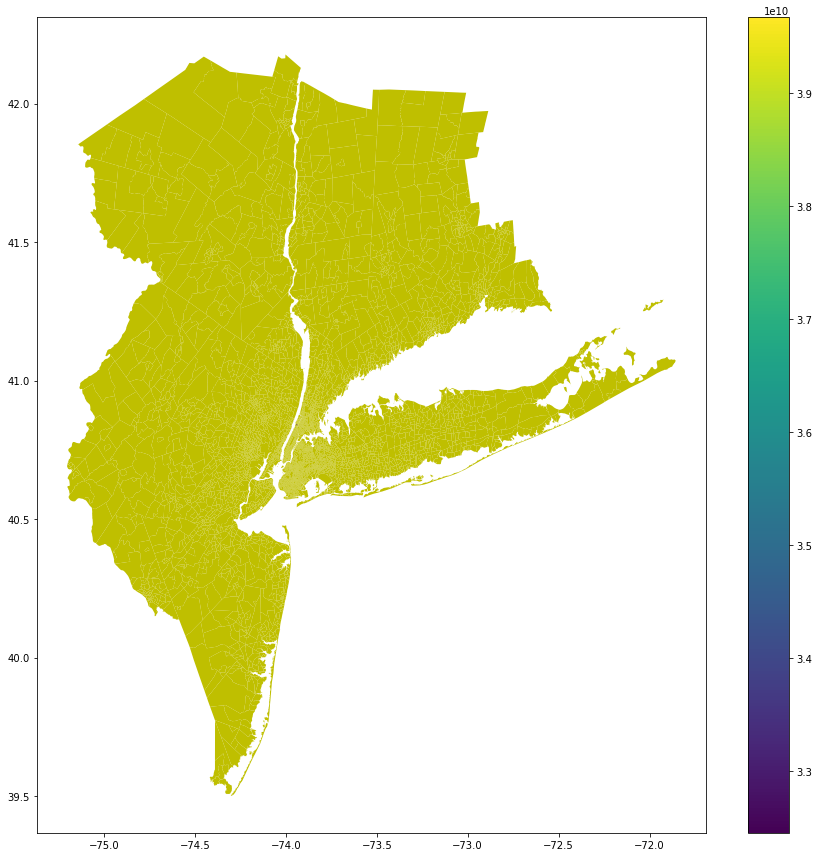

In [25]:
figure, ax = plt.subplots(figsize=(15, 15))
tempmergedgpd.plot(color="y",legend = True, ax=ax)
# tempmergedgpd.plot(color="w", edgecolor="k",legend = True, ax=ax)
tempmergedgpd[tempmergedgpd.GEOID==36061025100].plot(column='GEOID',legend = True, ax=ax)

In [26]:

a = Typ_Bin.percol00
b = Typ_Bin.percol16
a_unique = Typ_Bin.medhval00.unique()
b_unique = Typ_Bin.medhval16.unique()

np.sort(a)[:60], np.sort(b)[:15],np.sort(a_unique), np.sort(b_unique)

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.00526547,
         0.00574438,  0.00650054,  0.00767414,  0.00866956,  0.00884173]),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.00327011,  0

In [27]:
# sorted is for lists not numpy arrays!!!!!!!!!!!!!!!!!
# sorted(Typ_Bin.medhval00.unique())[:5], sorted(Typ_Bin.medhval16.unique())[:5]

a = Typ_Bin.medhval00
b = Typ_Bin.medhval16

np.sort(a)[:20], np.sort(b)[:85]

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9999.,  9999.,  9999.]),
 array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.

In [28]:
a = Typ_Bin.medhval00.unique()
b = Typ_Bin.medhval16.unique()

np.sort(a), np.sort(b)

(array([       0.   ,     9999.   ,    10000.   , ...,  1000000.058,
         1000001.   ,          nan]),
 array([       0.,    23100.,    24900., ...,  2000000.,  2000001.,
              nan]))

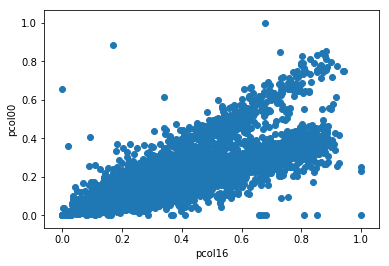

In [29]:
plt.scatter(Typ_Bin.percol16, Typ_Bin.percol00)
plt.xlabel('pcol16')
plt.ylabel('pcol00')

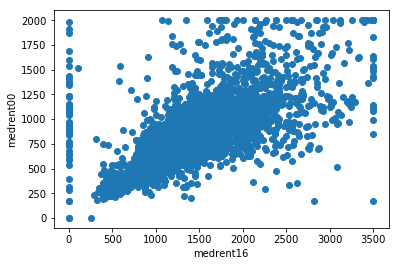

In [31]:
plt.scatter(Typ_Bin.medrent16, Typ_Bin.medrent00)
plt.xlabel('medrent16')
plt.ylabel('medrent00')

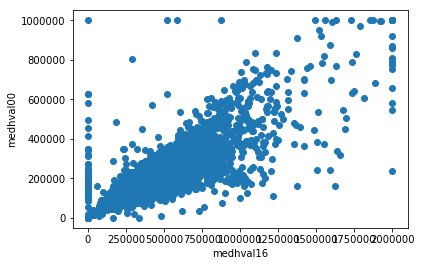

In [113]:
plt.scatter(Typ_Bin.medhval16, Typ_Bin.medhval00)
plt.xlabel('medhval16')
plt.ylabel('medhval00')

In [34]:
print(Typ_Bin.percol16.isnull().sum())
print(Typ_Bin.medrent16.isnull().sum())
print(Typ_Bin.medhval16.isnull().sum())
print(Typ_Bin.percol00.isnull().sum())
print(Typ_Bin.medrent00.isnull().sum())
print(Typ_Bin.medhval00.isnull().sum())
total1 = (Typ_Bin.percol16.isnull().sum()+Typ_Bin.medrent16.isnull().sum())+\
    (Typ_Bin.medhval16.isnull().sum())+(Typ_Bin.medrent00.isnull().sum())+(Typ_Bin.medhval00.isnull().sum()+\
                                                                          Typ_Bin.percol00.isnull().sum())
total1

47
160
201
4
57
76


545

In [35]:
Typ_Bin.pct_ch_hinc00_16= Typ_Bin.pct_ch_hinc00_16.replace(0,nan)
Typ_Bin.percol00= Typ_Bin.percol00.replace(0,nan)
Typ_Bin.percol16= Typ_Bin.percol16.replace(0,nan)

Typ_Bin.medhval00= Typ_Bin.medhval00.replace(0,nan)
Typ_Bin.medhval16= Typ_Bin.medhval16.replace(0,nan)
Typ_Bin.medrent00= Typ_Bin.medrent00.replace(0,nan)
Typ_Bin.medrent16= Typ_Bin.medrent16.replace(0,nan)


print(Typ_Bin.percol16.isnull().sum())
print(Typ_Bin.medrent16.isnull().sum())
print(Typ_Bin.medhval16.isnull().sum())
print(Typ_Bin.percol00.isnull().sum())
print(Typ_Bin.medrent00.isnull().sum())
print(Typ_Bin.medhval00.isnull().sum())
total2 = (Typ_Bin.percol16.isnull().sum()+Typ_Bin.medrent16.isnull().sum())+\
    (Typ_Bin.medhval16.isnull().sum())+(Typ_Bin.medrent00.isnull().sum())+(Typ_Bin.medhval00.isnull().sum()+\
                                                                          Typ_Bin.percol00.isnull().sum())
total2, total2-total1

54
232
282
58
60
93


(779, 234)

In [36]:
# Typ_Bin.pct_ch_hinc00_16= Typ_Bin.pct_ch_hinc00_16.replace(nan,Typ_Bin.pct_ch_hinc00_16.mean())
# Typ_Bin.medhval00= Typ_Bin.medhval00.replace(nan,Typ_Bin.medhval00.mean())
# Typ_Bin.medhval16= Typ_Bin.medhval16.replace(nan,Typ_Bin.medhval16.mean())
# Typ_Bin.medrent00= Typ_Bin.medrent00.replace(nan,Typ_Bin.medrent00.mean())
# Typ_Bin.medrent16= Typ_Bin.medrent16.replace(nan,Typ_Bin.medrent16.mean())

print(Typ_Bin.percol16.isnull().sum())
print(Typ_Bin.medrent16.isnull().sum())
print(Typ_Bin.medhval16.isnull().sum())
print(Typ_Bin.percol00.isnull().sum())
print(Typ_Bin.medrent00.isnull().sum())
print(Typ_Bin.medhval00.isnull().sum())
total3 = (Typ_Bin.percol16.isnull().sum()+Typ_Bin.medrent16.isnull().sum())+\
    (Typ_Bin.medhval16.isnull().sum())+(Typ_Bin.medrent00.isnull().sum())+(Typ_Bin.medhval00.isnull().sum()+\
                                                                          Typ_Bin.percol00.isnull().sum())
total3, total3- total2


54
232
282
58
60
93


(779, 0)

In [37]:
# CREATE
Typ_Bin['pct_ch_percol00_16'] = (Typ_Bin.percol16-Typ_Bin.percol00)/Typ_Bin.percol00
Typ_Bin['pct_ch_medhval00_16'] = (Typ_Bin.medhval16-Typ_Bin.medhval00)/Typ_Bin.medhval00
Typ_Bin['pct_ch_medrent00_16'] = (Typ_Bin.medrent16-Typ_Bin.medrent00)/Typ_Bin.medrent00

In [38]:
Typ_Bin.pct_ch_medhval00_16.describe(), Typ_Bin.pct_ch_medrent00_16.describe(), Typ_Bin.pct_ch_percol00_16.describe()

(count    4997.000000
 mean        1.158986
 std         1.076018
 min        -0.647572
 25%         0.752347
 50%         0.959695
 75%         1.327322
 max        47.134813
 Name: pct_ch_medhval00_16, dtype: float64, count    5055.000000
 mean        0.758778
 std         0.545028
 min        -0.934783
 25%         0.524811
 50%         0.703571
 75%         0.895084
 max        19.000000
 Name: pct_ch_medrent00_16, dtype: float64, count    5219.000000
 mean        1.207427
 std         1.229411
 min        -0.944937
 25%         0.565233
 50%         1.028110
 75%         1.491479
 max        24.979950
 Name: pct_ch_percol00_16, dtype: float64)

In [39]:
# CLEAN
# ALL TO SAME SIZE
Typ_Bin.isnull().sum().sum(),Typ_Bin.isnull().sum()

(1896, GEOID                    0
 High_low                 0
 medrent00               60
 medrent16              232
 medhval00               93
 medhval16              282
 hinc00                  51
 hinc16                  87
 percol00                58
 percol16                54
 pct_ch_hinc00_16       116
 gent00_16               75
 gent90_00               75
 Supergent16            102
 Ongoing_adv_gent         0
 pct_ch_percol00_16      75
 pct_ch_medhval00_16    297
 pct_ch_medrent00_16    239
 dtype: int64)

In [40]:
print(Typ_Bin.shape)
Typ_Bin =Typ_Bin.dropna(how='all',axis=0)
print(Typ_Bin.shape)
Typ_Bin = Typ_Bin.dropna(axis=0)
print(Typ_Bin.shape)
cols_X = [i for i in Typ_Bin.columns] #if (i != 'pct_ch_hinc00_16')&(i != 'GEOID')]
print(cols_X)

(5294, 18)
(5294, 18)
(4829, 18)
['GEOID', 'High_low', 'medrent00', 'medrent16', 'medhval00', 'medhval16', 'hinc00', 'hinc16', 'percol00', 'percol16', 'pct_ch_hinc00_16', 'gent00_16', 'gent90_00', 'Supergent16', 'Ongoing_adv_gent', 'pct_ch_percol00_16', 'pct_ch_medhval00_16', 'pct_ch_medrent00_16']


In [41]:
Typ_Bin.isnull().sum()

GEOID                  0
High_low               0
medrent00              0
medrent16              0
medhval00              0
medhval16              0
hinc00                 0
hinc16                 0
percol00               0
percol16               0
pct_ch_hinc00_16       0
gent00_16              0
gent90_00              0
Supergent16            0
Ongoing_adv_gent       0
pct_ch_percol00_16     0
pct_ch_medhval00_16    0
pct_ch_medrent00_16    0
dtype: int64

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


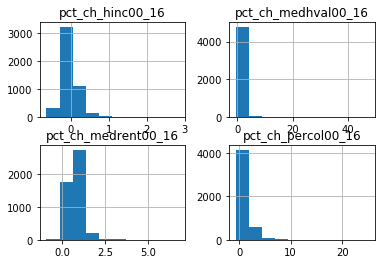

In [42]:
# Explore 
newTyps_values = ['pct_ch_percol00_16','pct_ch_medhval00_16','pct_ch_medrent00_16','pct_ch_hinc00_16']

Typ_Bin.loc[:,newTyps_values]
plt.figure(1)
# for k, i in enumerate(newTyps_values):
#     print(k,i)
#     plt.subplot(4,1,k)
Typ_Bin.loc[:,newTyps_values].hist(ax=plt.gca(), figsize = (20,5))
plt.show()
# plt.subplot(4,1,2)
# Typ_Bin.pct_ch_medhval00_16.hist(ax=plt.gca(),) #no need to specify for first axis
# plt.subplot(4,1,3)
# Typ_Bin.pct_ch_medrent00_16.hist(ax=plt.gca())
# plt.subplot(4,1,4)
# Typ_Bin.pct_ch_percol00_16.hist(ax=plt.gca())

In [53]:
print(Typ_Bin.pct_ch_percol00_16.isnull().sum())
print(Typ_Bin.pct_ch_percol00_16.describe())
print(Typ_Bin.pct_ch_medhval00_16.isnull().sum())
print(Typ_Bin.pct_ch_medhval00_16.describe())
print(Typ_Bin.pct_ch_medrent00_16.isnull().sum())
print(Typ_Bin.pct_ch_medrent00_16.describe())
print(Typ_Bin.pct_ch_hinc00_16.isnull().sum())
print(Typ_Bin.pct_ch_hinc00_16.describe())

0
count    4829.000000
mean        1.184850
std         1.177483
min        -0.707061
25%         0.563905
50%         1.020412
75%         1.470244
max        24.979950
Name: pct_ch_percol00_16, dtype: float64
0
count    4829.000000
mean        1.168527
std         1.090358
min        -0.647572
25%         0.755299
50%         0.968215
75%         1.341555
max        47.134813
Name: pct_ch_medhval00_16, dtype: float64
0
count    4829.000000
mean        0.743004
std         0.418239
min        -0.934783
25%         0.521942
50%         0.696523
75%         0.889692
max         6.789965
Name: pct_ch_medrent00_16, dtype: float64
0
count    4829.000000
mean       -0.017278
std         0.231754
min        -0.635845
25%        -0.154222
50%        -0.052021
75%         0.073200
max         2.838292
Name: pct_ch_hinc00_16, dtype: float64


In [44]:
# Filter Low Incomes
Typ_Bin.head(1)

,GEOID,High_low,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,percol00,percol16,pct_ch_hinc00_16,gent00_16,gent90_00,Supergent16,Ongoing_adv_gent,pct_ch_percol00_16,pct_ch_medhval00_16,pct_ch_medrent00_16
0,9.001010e+09,H,1601.0,1510.0,1000001.0,1494000.0,273976.05,150655.0,0.354071,0.619597,-0.450116,0.0,0.0,1.0,0.0,0.749923,0.493999,-0.056839


# Filter low incomes

In [45]:

Typ_Low_Incomes = Typ_Bin.loc[Typ_Bin['High_low'] == 'L'].copy()
print(Typ_Low_Incomes.shape)
Typ_Low_Incomes.tail()

(1562, 18)


,GEOID,High_low,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,percol00,percol16,pct_ch_hinc00_16,gent00_16,gent90_00,Supergent16,Ongoing_adv_gent,pct_ch_percol00_16,pct_ch_medhval00_16,pct_ch_medrent00_16
5255,3.611901e+10,L,791.000000,1558.0,175200.0000,352500.0,44168.45000,46917.0,0.155505,0.205989,0.062229,0.0,1.0,0.0,1.0,0.324645,1.011986,0.969659
5264,3.611901e+10,L,830.000000,1369.0,168900.0000,318900.0,60405.55000,46884.0,0.168866,0.296474,-0.223846,0.0,0.0,0.0,0.0,0.755675,0.888099,0.649398
5265,3.611901e+10,L,795.003049,1433.0,155806.9129,300300.0,70887.26429,53854.0,0.221004,0.251836,-0.240287,0.0,0.0,0.0,0.0,0.139508,0.927386,0.802509
5266,3.611901e+10,L,740.000000,1167.0,128600.0000,290500.0,34495.50000,35813.0,0.112580,0.104022,0.038193,0.0,0.0,0.0,0.0,-0.076020,1.258942,0.577027
5281,3.611901e+10,L,906.000024,1651.0,228500.0059,256300.0,105238.10270,38323.0,0.369576,0.226161,-0.635845,0.0,0.0,0.0,0.0,-0.388053,0.121663,0.822296


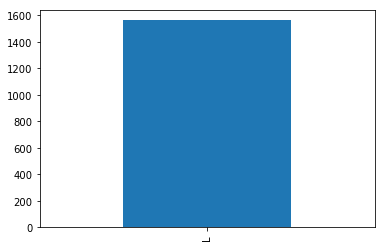

In [46]:
Typ_Low_Incomes['High_low'].value_counts().plot(kind='bar')

In [70]:
Typ_Low_Incomes['pct_ch_percol00_16_binary'] = (Typ_Low_Incomes.pct_ch_percol00_16> Typ_Low_Incomes.pct_ch_percol00_16.std())
print((Typ_Low_Incomes.pct_ch_percol00_16_binary.sum()))
print((Typ_Low_Incomes.pct_ch_percol00_16_binary.sum()/len(Typ_Low_Incomes)))
print((Typ_Low_Incomes.pct_ch_percol00_16_binary.sum()/len(Typ_Bin)))

Typ_Low_Incomes.pct_ch_percol00_16_binary.replace(False,0, inplace=True)
Typ_Low_Incomes.pct_ch_percol00_16_binary.replace(True,1, inplace=True)
Typ_Low_Incomes.pct_ch_percol00_16_binary  = pd.to_numeric(Typ_Low_Incomes.pct_ch_percol00_16_binary)

413
0.264404609475
0.0855249534065


In [69]:
Typ_Low_Incomes['pct_ch_medhval00_16_binary'] = (Typ_Low_Incomes.pct_ch_medhval00_16> Typ_Low_Incomes.pct_ch_medhval00_16.std())
print((Typ_Low_Incomes.pct_ch_medhval00_16_binary.sum()))
print((Typ_Low_Incomes.pct_ch_medhval00_16_binary.sum()/len(Typ_Low_Incomes)))
print((Typ_Low_Incomes.pct_ch_medhval00_16_binary.sum()/len(Typ_Bin)))

Typ_Low_Incomes.pct_ch_medhval00_16_binary.replace(False,0, inplace=True)
Typ_Low_Incomes.pct_ch_medhval00_16_binary.replace(True,1, inplace=True)
Typ_Low_Incomes.pct_ch_medhval00_16_binary  = pd.to_numeric(Typ_Low_Incomes.pct_ch_medhval00_16_binary)

421
0.269526248399
0.0871816110996


In [49]:
Typ_Low_Incomes.pct_ch_percol00_16.std(),Typ_Low_Incomes.pct_ch_medrent00_16.std(),Typ_Low_Incomes.pct_ch_medhval00_16.std()

(1.7199146856845178, 0.2876336101001484, 1.513224552531152)

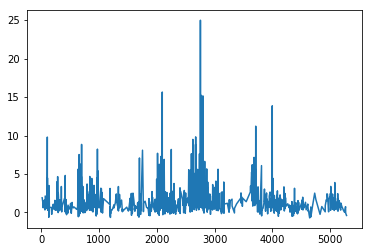

In [50]:
Typ_Low_Incomes.pct_ch_percol00_16.plot()

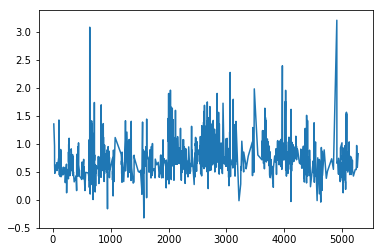

In [51]:
Typ_Low_Incomes.pct_ch_medrent00_16.plot()

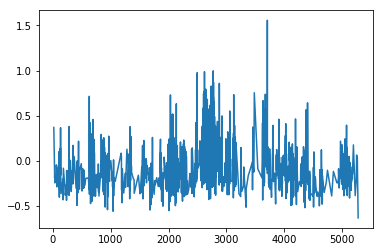

In [52]:
Typ_Low_Incomes.pct_ch_hinc00_16.plot()

In [71]:
Typ_Low_Incomes['pct_ch_medrent00_16_binary'] = (Typ_Low_Incomes.pct_ch_medrent00_16> Typ_Low_Incomes.pct_ch_medrent00_16.std())
print((Typ_Low_Incomes.pct_ch_medrent00_16_binary.sum()))
print((Typ_Low_Incomes.pct_ch_medrent00_16_binary.sum()/len(Typ_Low_Incomes)))
print((Typ_Low_Incomes.pct_ch_medrent00_16_binary.sum()/len(Typ_Bin)))

Typ_Low_Incomes.pct_ch_medrent00_16_binary.replace(False,0, inplace=True)
Typ_Low_Incomes.pct_ch_medrent00_16_binary.replace(True,1, inplace=True)
Typ_Low_Incomes.pct_ch_medrent00_16_binary  = pd.to_numeric(Typ_Low_Incomes.pct_ch_medrent00_16_binary)

1524
0.975672215109
0.315593290536


In [72]:
Typ_Low_Incomes['pct_ch_hinc00_16_binary'] = (Typ_Low_Incomes.pct_ch_hinc00_16> Typ_Low_Incomes.pct_ch_hinc00_16.std())

print(Typ_Low_Incomes.pct_ch_hinc00_16_binary.sum())
print(Typ_Low_Incomes.pct_ch_hinc00_16_binary.sum()/len(Typ_Low_Incomes))
print(Typ_Low_Incomes.pct_ch_hinc00_16_binary.sum()/len(Typ_Bin))

Typ_Low_Incomes.pct_ch_hinc00_16_binary.replace(False,0, inplace=True)
Typ_Low_Incomes.pct_ch_hinc00_16_binary.replace(True,1, inplace=True)
Typ_Low_Incomes.pct_ch_hinc00_16_binary  = pd.to_numeric(Typ_Low_Incomes.pct_ch_hinc00_16_binary)

143
0.0915492957746
0.0296127562642


In [139]:
newTyps = ['pct_ch_percol00_16_binary','pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','pct_ch_hinc00_16_binary']
Typ_Low_Incomes = Typ_Low_Incomes.loc[:,newTyps+['GEOID']]
Typ_Low_Incomes.head()

,pct_ch_percol00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,pct_ch_hinc00_16_binary,GEOID
15,1.0,0.0,1.0,1.0,9.001020e+09
28,0.0,0.0,1.0,0.0,9.001021e+09
29,0.0,0.0,1.0,0.0,9.001022e+09
33,0.0,0.0,1.0,0.0,9.001022e+09
35,0.0,0.0,1.0,0.0,9.001022e+09


In [140]:
# Typ_Bin.pct_ch_percol00_16

In [141]:
print(Typ_Low_Incomes.shape)
print(Typ_Bin.shape)
Typ_Bin = Typ_Bin.merge(Typ_Low_Incomes, on='GEOID',how='outer')
print(Typ_Bin.shape)

Typ_Bin.replace(nan,0, inplace=True)
Typ_Bin.tail()

(1562, 5)
(4829, 18)
(4829, 22)


,GEOID,High_low,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,percol00,percol16,...,gent90_00,Supergent16,Ongoing_adv_gent,pct_ch_percol00_16,pct_ch_medhval00_16,pct_ch_medrent00_16,pct_ch_percol00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,pct_ch_hinc00_16_binary
4824,3.611901e+10,H,1645.999961,2492.0,259399.9935,443400.0,104085.3539,87746.0,0.531846,0.542408,...,0.0,0.0,0.0,0.019859,0.709329,0.513973,0.0,0.0,0.0,0.0
4825,3.611901e+10,H,1368.000000,1417.0,219600.0000,395500.0,124981.3000,110610.0,0.417178,0.458103,...,0.0,0.0,0.0,0.098099,0.801002,0.035819,0.0,0.0,0.0,0.0
4826,3.611901e+10,H,1875.000000,1615.0,341999.9883,614400.0,165790.0965,138571.0,0.598964,0.520121,...,0.0,0.0,0.0,-0.131633,0.796491,-0.138667,0.0,0.0,0.0,0.0
4827,3.611901e+10,H,1645.999934,2194.0,259399.9949,432600.0,104085.3478,104286.0,0.531846,0.680927,...,0.0,0.0,0.0,0.280309,0.667695,0.332928,0.0,0.0,0.0,0.0
4828,3.611902e+10,H,1150.000000,1705.0,319700.0000,584300.0,145406.0000,126724.0,0.485083,0.600913,...,0.0,0.0,0.0,0.238783,0.827651,0.482609,0.0,0.0,0.0,0.0


# Visualize ALL

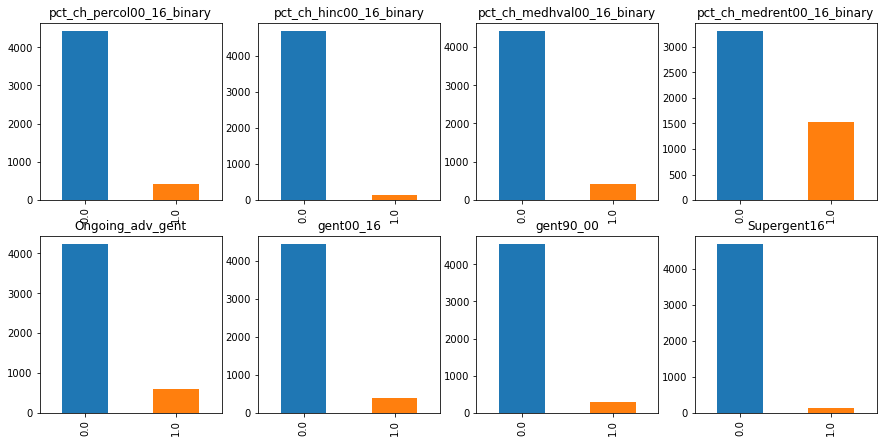

In [142]:
bin_typs = ['pct_ch_percol00_16_binary','pct_ch_hinc00_16_binary',
            'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','Ongoing_adv_gent',
            'gent00_16','gent90_00','Supergent16']
for i, column in enumerate(bin_typs):
    plt.figure(1)
    plt.subplot(4,4,i+1)
    Typ_Bin[column].value_counts().plot(kind='bar', figsize = (15,15), title=column)
    Typ_Bin[column].value_counts()/Typ_Bin[column].value_counts().sum()

In [143]:
# Typ_Bin_new.columns

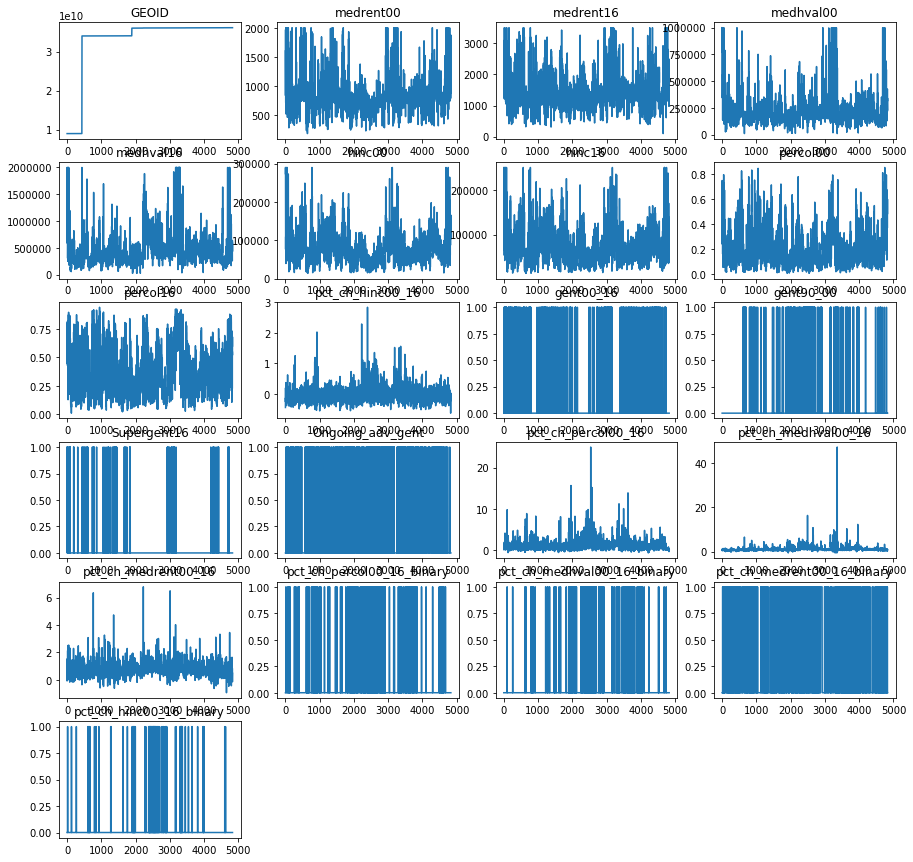

In [66]:
for i, column in enumerate(Typ_Bin.drop('High_low',axis=1).columns):
    plt.figure(1)
    plt.subplot(6,4,i+1)
    Typ_Bin[column].plot(figsize = (15,15), title=column)

In [67]:
# print(column)
# Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]]
(1-Typ_Bin.medrent16.isnull()).sum(), Typ_Bin.shape

(4829, (4829, 22))

In [145]:
matches = pd.DataFrame()
matches_percentage = pd.DataFrame()
matches_positives = pd.DataFrame()

for i, column_1 in enumerate(bin_typs):
    for k, column_2 in enumerate(bin_typs):
        if i > k:
             continue
        matches_percentage.loc[column_1,column_2]  = \
            Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].count()/(len(Typ_Bin[column_1]))
        matches.loc[column_1,column_2] = Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].count()
        matches_positives.loc[column_1,column_2] = Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].sum()
#         print(column_1+'=='+column_2+\
#               '\t'+str(Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].count())+' times'+\
#              'out of '+str(len(Typ_Bin[column_1]))+'\t'\
#               +str(Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].count()/(len(Typ_Bin[column_1]))))
        
matches_percentage

,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16
pct_ch_percol00_16_binary,1.0,0.92048,0.893974,0.767861,0.835370,0.840754,0.895216,0.886726
pct_ch_hinc00_16_binary,NaN,1.00000,0.911783,0.714019,0.863533,0.894181,0.926279,0.942638
pct_ch_medhval00_16_binary,NaN,NaN,1.000000,0.770346,0.829571,0.835784,0.891903,0.885069
pct_ch_medrent00_16_binary,NaN,NaN,NaN,1.000000,0.657072,0.616070,0.711949,0.656658
Ongoing_adv_gent,NaN,NaN,NaN,NaN,1.000000,0.927521,0.934769,0.849244
gent00_16,NaN,NaN,NaN,NaN,NaN,1.000000,0.864775,0.921723
gent90_00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.914475
Supergent16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [147]:
matches_positives

,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16
pct_ch_percol00_16_binary,413.0,86.0,161.0,408.0,106.0,13.0,94.0,0.0
pct_ch_hinc00_16_binary,NaN,143.0,69.0,143.0,39.0,7.0,34.0,0.0
pct_ch_medhval00_16_binary,NaN,NaN,421.0,418.0,96.0,5.0,90.0,0.0
pct_ch_medrent00_16_binary,NaN,NaN,NaN,1524.0,231.0,26.0,207.0,0.0
Ongoing_adv_gent,NaN,NaN,NaN,NaN,594.0,313.0,280.0,0.0
gent00_16,NaN,NaN,NaN,NaN,NaN,382.0,5.0,69.0
gent90_00,NaN,NaN,NaN,NaN,NaN,NaN,281.0,1.0
Supergent16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.0


In [148]:
matches

,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16
pct_ch_percol00_16_binary,4829.0,4445.0,4317.0,3708.0,4034.0,4060.0,4323.0,4282.0
pct_ch_hinc00_16_binary,NaN,4829.0,4403.0,3448.0,4170.0,4318.0,4473.0,4552.0
pct_ch_medhval00_16_binary,NaN,NaN,4829.0,3720.0,4006.0,4036.0,4307.0,4274.0
pct_ch_medrent00_16_binary,NaN,NaN,NaN,4829.0,3173.0,2975.0,3438.0,3171.0
Ongoing_adv_gent,NaN,NaN,NaN,NaN,4829.0,4479.0,4514.0,4101.0
gent00_16,NaN,NaN,NaN,NaN,NaN,4829.0,4176.0,4451.0
gent90_00,NaN,NaN,NaN,NaN,NaN,NaN,4829.0,4416.0
Supergent16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4829.0


In [149]:
merged = NYCzip.merge(Typ_Bin,on='GEOID')
list(merged.columns)
print(type(merged),merged.shape)
mergedgpd = gpd.GeoDataFrame(merged)
mergedgpd.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (4829, 23)


(4829, 23)

In [150]:
mergedgpd.head(2)

,GEOID,geometry,High_low,medrent00,medrent16,medhval00,medhval16,hinc00,hinc16,percol00,...,gent90_00,Supergent16,Ongoing_adv_gent,pct_ch_percol00_16,pct_ch_medhval00_16,pct_ch_medrent00_16,pct_ch_percol00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,pct_ch_hinc00_16_binary
0,34013021601,"POLYGON ((-74.3228040001045 40.90883400018899,...",H,988.0,1854.0,273900.0,472100.0,120523.9989,100977.0,0.231504,...,0.0,0.0,0.0,0.600676,0.723622,0.876518,0.0,0.0,0.0,0.0
1,34003031100,POLYGON ((-74.08304199968846 40.78623200040653...,H,808.0,1394.0,192600.0,370700.0,72720.4000,69669.0,0.155385,...,0.0,0.0,0.0,1.757281,0.924714,0.725248,0.0,0.0,0.0,0.0


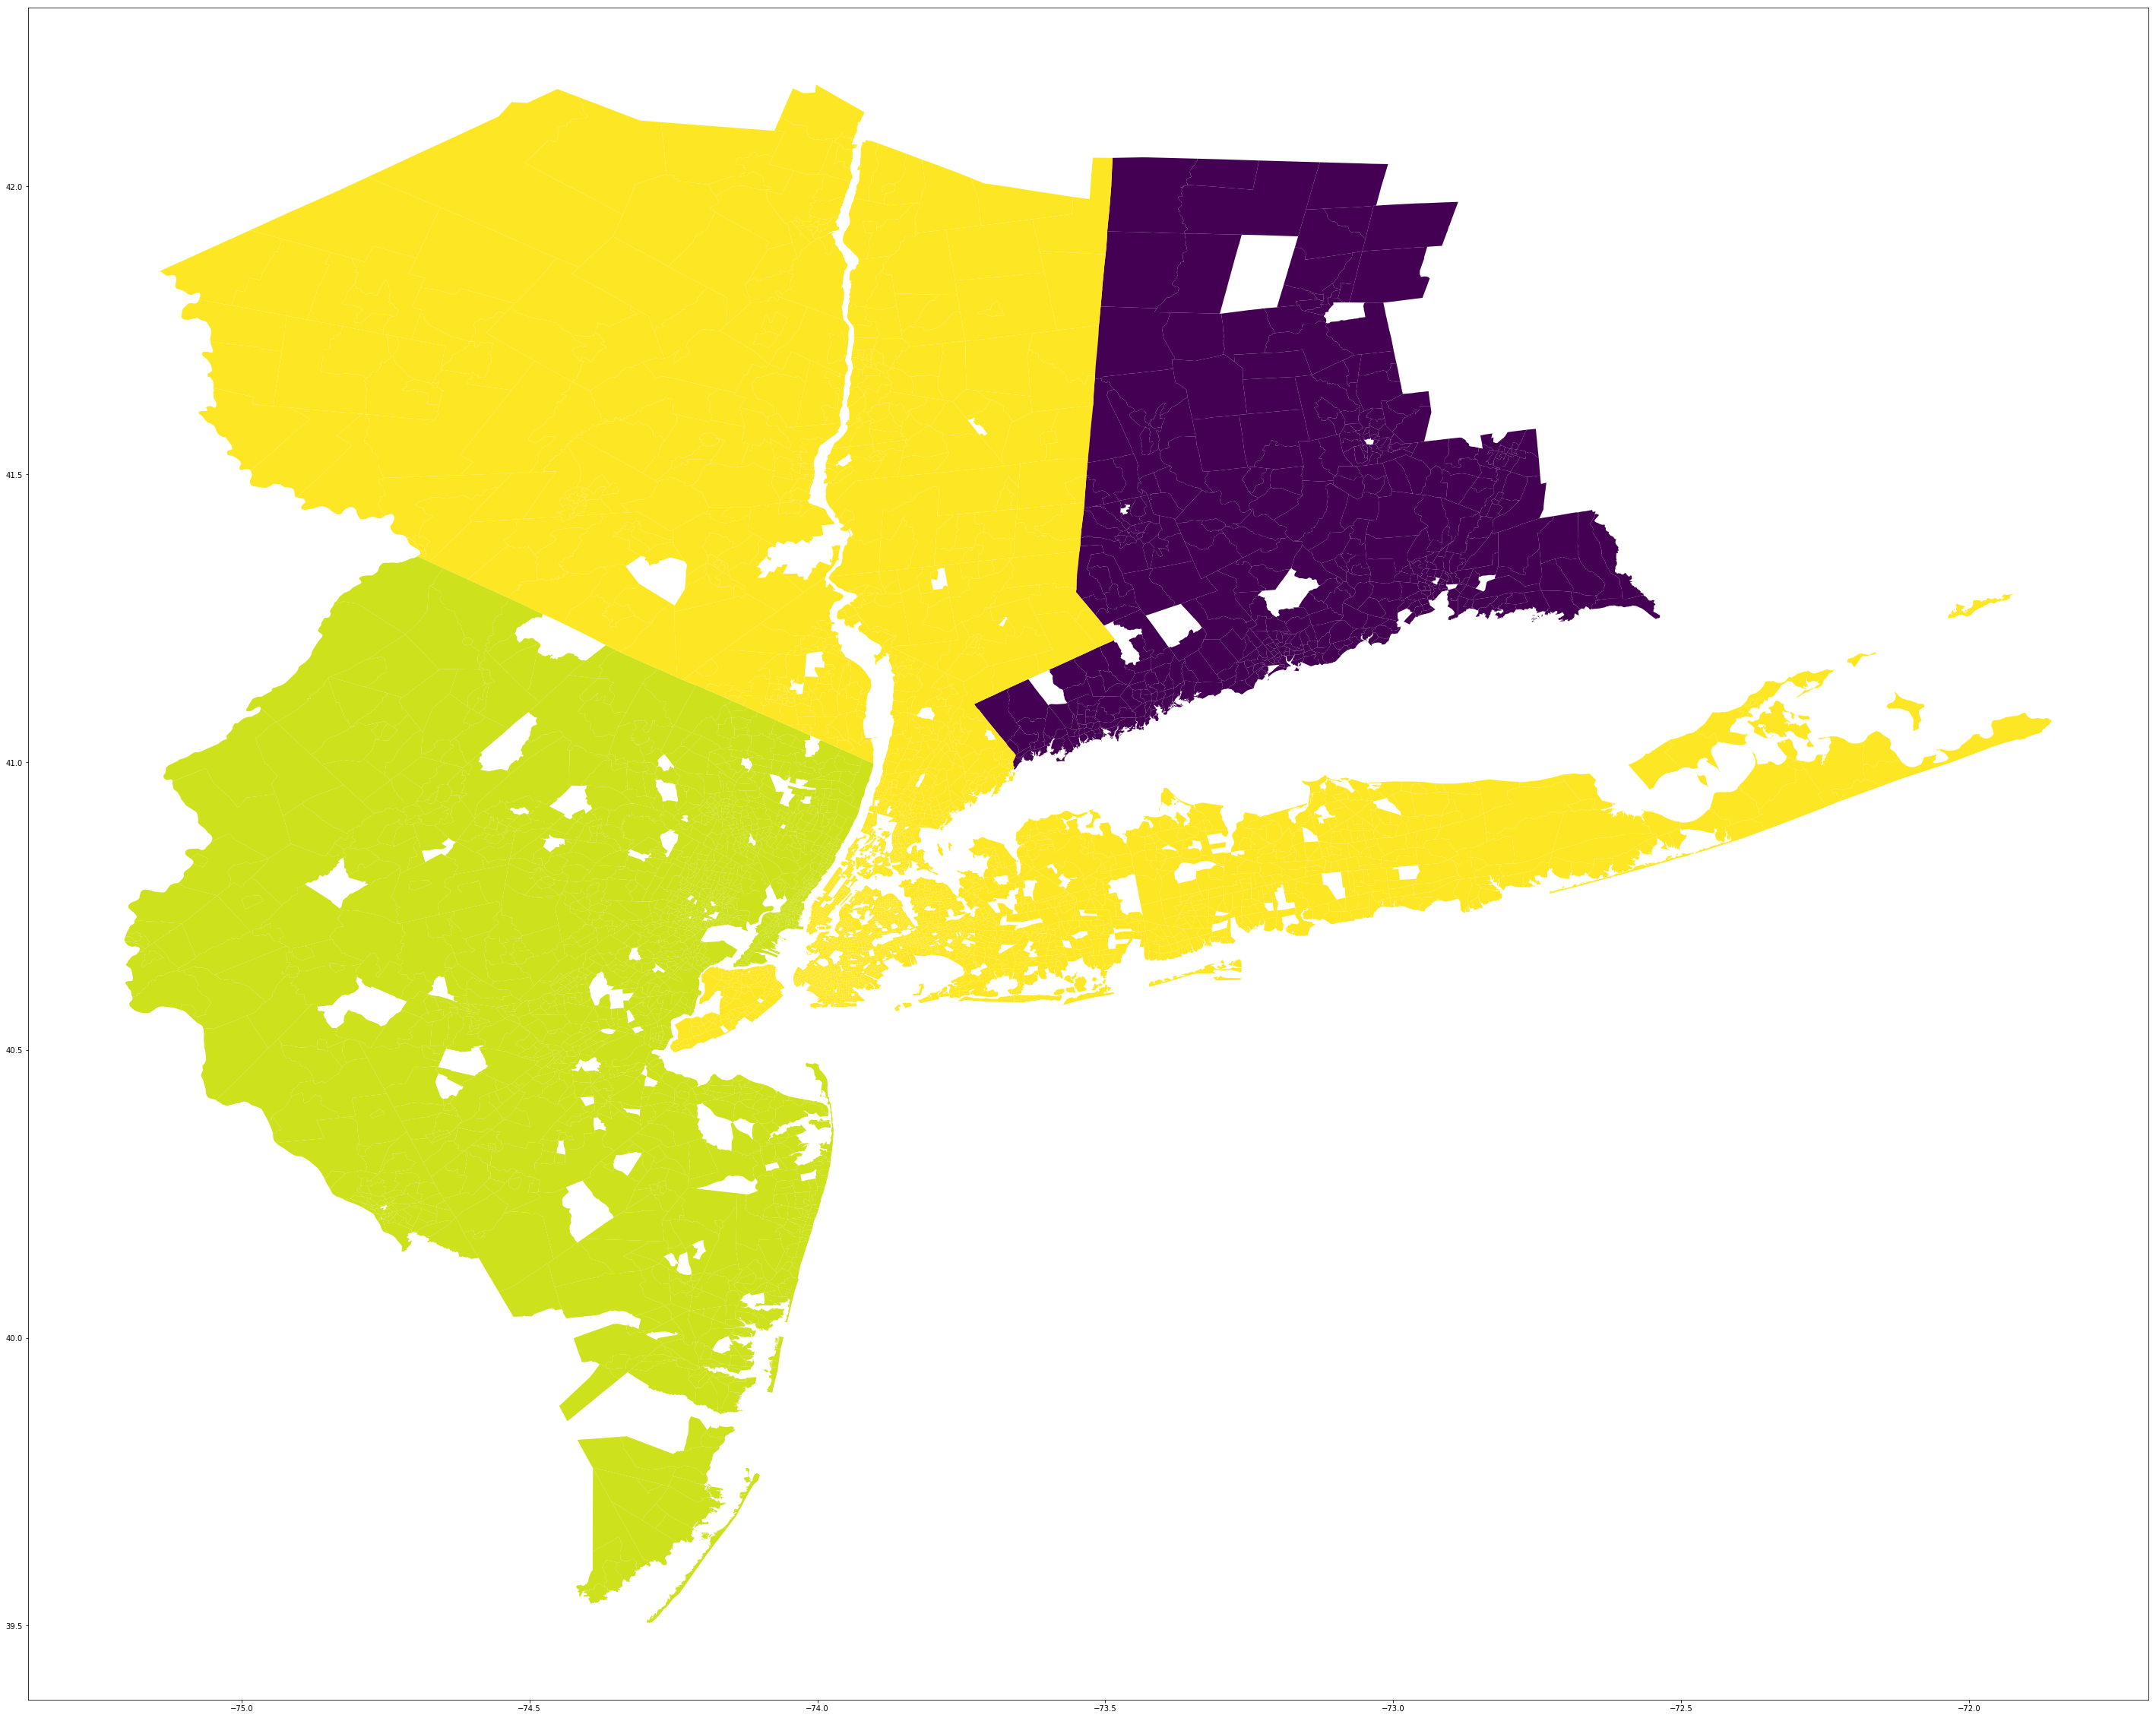

In [151]:
mergedgpd.plot(column='GEOID', figsize=(50,50))

In [74]:
# for i, column_1 in enumerate(bin_typs):
#     print('-----------------------------------------------------------------------------')
#     print('Blank areas shows point were typologies do not match')
#     print(column_1+ ' MATCHES')
#     plt.figure(i,figsize=(15, 15))
#     for k, column_2 in enumerate(bin_typs):
#         if i == k:
#             continue
#         print(column_1+'=='+column_2+\
#       '\t'+str(Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].count())+' times'+\
#      'out of '+str(len(Typ_Bin[column_1]))+'\t'\
#       +str(Typ_Bin[Typ_Bin[column_1] == Typ_Bin[column_2]][column_1].count()/(len(Typ_Bin[column_1]))))
#         plt.figure(figsize=(15, 15))
#         ax = plt.subplot(4,4,k+1, )
#         mergedgpd[mergedgpd[column_1] == mergedgpd[column_2]].plot(column=column_1,legend = True,ax=ax)
#         plt.title(column_1+' '+column_2)
#         plt.show()

In [75]:
cols_typ = bin_typs+ ['GEOID']
output_mergedgpd = mergedgpd.loc[:,cols_typ].copy()


In [76]:
output_mergedgpd.to_csv('NEW_6_BINARIES_DROPNAN.csv')

In [77]:
print(output_mergedgpd.shape)
output_mergedgpd.tail()

(4829, 9)


,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16,GEOID
4824,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36061020300
4825,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36061021100
4826,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,36061021200
4827,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,36061022102
4828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36047152200


In [78]:
bin_typs

['pct_ch_percol00_16_binary',
 'pct_ch_hinc00_16_binary',
 'pct_ch_medhval00_16_binary',
 'pct_ch_medrent00_16_binary',
 'Ongoing_adv_gent',
 'gent00_16',
 'gent90_00',
 'Supergent16']

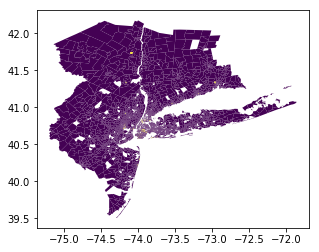

In [79]:
mergedgpd.plot(column='pct_ch_hinc00_16_binary')

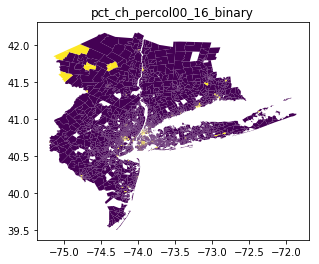

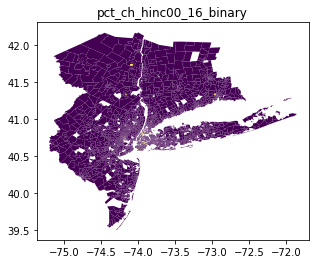

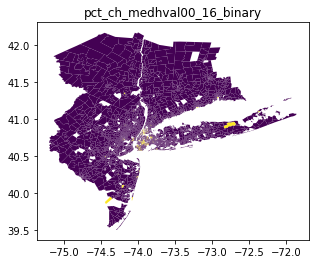

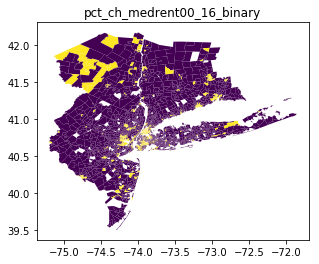

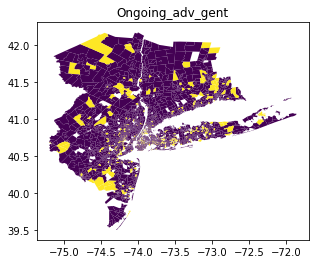

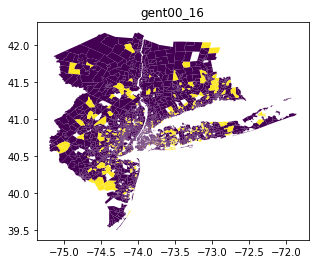

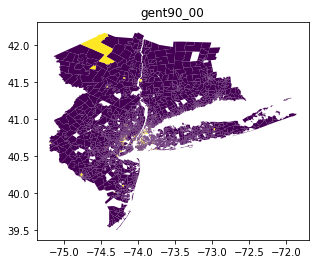

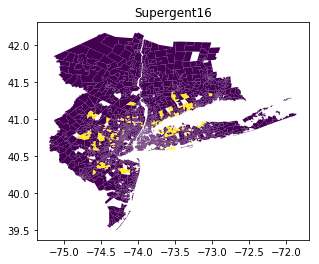

In [160]:
for i, column in enumerate(bin_typs):
    mergedgpd.plot(column=column)
    plt.title(column)

In [161]:
output_mergedgpd.tail(1)

,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16,GEOID
4828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36047152200


In [ ]:
#END